In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

import thecannon as tc
training_label_df = pd.read_csv('./training_labels.csv')
training_flux_df = pd.read_csv('./training_flux.csv')
training_sigma_df = pd.read_csv('./training_sigma.csv')
cks_model = tc.CannonModel.read('./hires_i_chip.model')

In [2]:
def plot_one_to_one(label_df, flux_df, sigma_df, model, 
    figure_path, path_to_save_labels=None):
    """
    Plot a one-to-one comparison of the training set labels from GALAH and the Cannon
    labels inferred from the training set spectra.
    """
    pc = 'k';markersize=1;alpha_value=0.5
    labels_to_plot = ['cks_steff', 'cks_slogg', 'cks_smet','cks_svsini']

    def compute_cannon_labels(label_df, flux_df, sigma_df, model):
        cks_keys = labels_to_plot
        cannon_keys = [key.replace('cks','cannon') for key in labels_to_plot]

        cannon_label_data = []
        # iterate over each object
        for id_starname in label_df.id_starname.to_numpy():
            # store galah labels
            row = label_df.loc[label_df.id_starname==id_starname]
            cks_labels = row[cks_keys].values.flatten().tolist()
            # fit cannon model
            flux = flux_df[str(id_starname)]
            sigma = sigma_df[str(id_starname)]
            ivar = 1/sigma**2
            result = model.test(flux, ivar)
            teff_fit, logg_fit, met_fit, vsini_fit = result[0][0]
            # store cannon labels
            cannon_labels = [teff_fit, logg_fit, met_fit, vsini_fit]
            # convert to dictionary
            keys = ['id_starname'] + cks_keys + cannon_keys
            values = [id_starname] + cks_labels + cannon_labels
            cannon_label_data.append(dict(zip(keys, values)))
        cannon_label_df = pd.DataFrame(cannon_label_data)
        return cannon_label_df

    def plot_label_one_to_one(label_df, label):
        x = label_df['cks_{}'.format(label)]
        y = label_df['cannon_{}'.format(label)]
        # model performance metrics
        diff = y - x
        bias = np.round(np.mean(diff), 3)
        rms = np.round(np.sqrt(np.sum(diff**2)/len(diff)), 3)
    
        # CKS label uncertainty (expected performance)
        error_arr1 = training_label_df['cks_'+label+'_err1'].to_numpy()
        error_arr2 = training_label_df['cks_'+label+'_err2'].to_numpy()
        error = np.abs(np.vstack((error_arr1, error_arr2))).flatten()
        error = np.round(np.median(error), 3)
        
        subplot_label = 'bias, rms = {}, {}\navg. CKS error={}'.format(bias, rms, error)
        plt.plot(x, y, '.', color=pc, ms=markersize, alpha=alpha_value)
        plt.plot([], [], '.', color='w', label=subplot_label)
        plt.xlabel('CKS {}'.format(label));plt.ylabel('Cannon {}'.format(label))
        plt.plot([x.min(), x.max()], [x.min(), x.max()], lw=0.7, color='#AA8ED9')
        plt.legend(loc='upper left', frameon=False, labelcolor='firebrick')

    def plot_label_difference(label_df, label):
        x = label_df['cks_{}'.format(label)]
        y = label_df['cannon_{}'.format(label)]
        diff = y - x
        plt.hist(diff, histtype='step', color=pc)
        plt.xlabel(r'$\Delta {}$'.format(label))

    cannon_label_df = compute_cannon_labels(
        label_df, 
        flux_df, 
        sigma_df, 
        model)

    if path_to_save_labels is not None:
        cannon_label_filename = './'+path_to_save_labels+'.csv'
        cannon_label_df.to_csv(cannon_label_filename)
        print('cannon label dataframe saved to {}'.format(cannon_label_filename))

    gs = gridspec.GridSpec(5, 2, width_ratios=[2,1])
    plt.figure(figsize=(10,17))
    for i in range(len(labels_to_plot)):
        plt.subplot(gs[2*i])
        plot_label_one_to_one(cannon_label_df, labels_to_plot[i][4:])
        plt.subplot(gs[2*i+1])
        plot_label_difference(cannon_label_df, labels_to_plot[i][4:])
    plt.savefig(figure_path, dpi=300)

stty: stdin isn't a terminal
2023-07-05 11:03:16,298 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:16,300 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (3s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:18,944 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:18,946 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:19,064 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:19,066 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:19,177 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:19,178 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:19,325 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:19,327 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:19,416 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:19,418 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:19,514 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:19,516 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:19,600 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:19,601 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:19,690 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:19,693 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-07-05 11:03:19,779 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-07-05 11:03:19,781 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         
cannon label dataframe saved to ./training_set_cannon_labels.csv


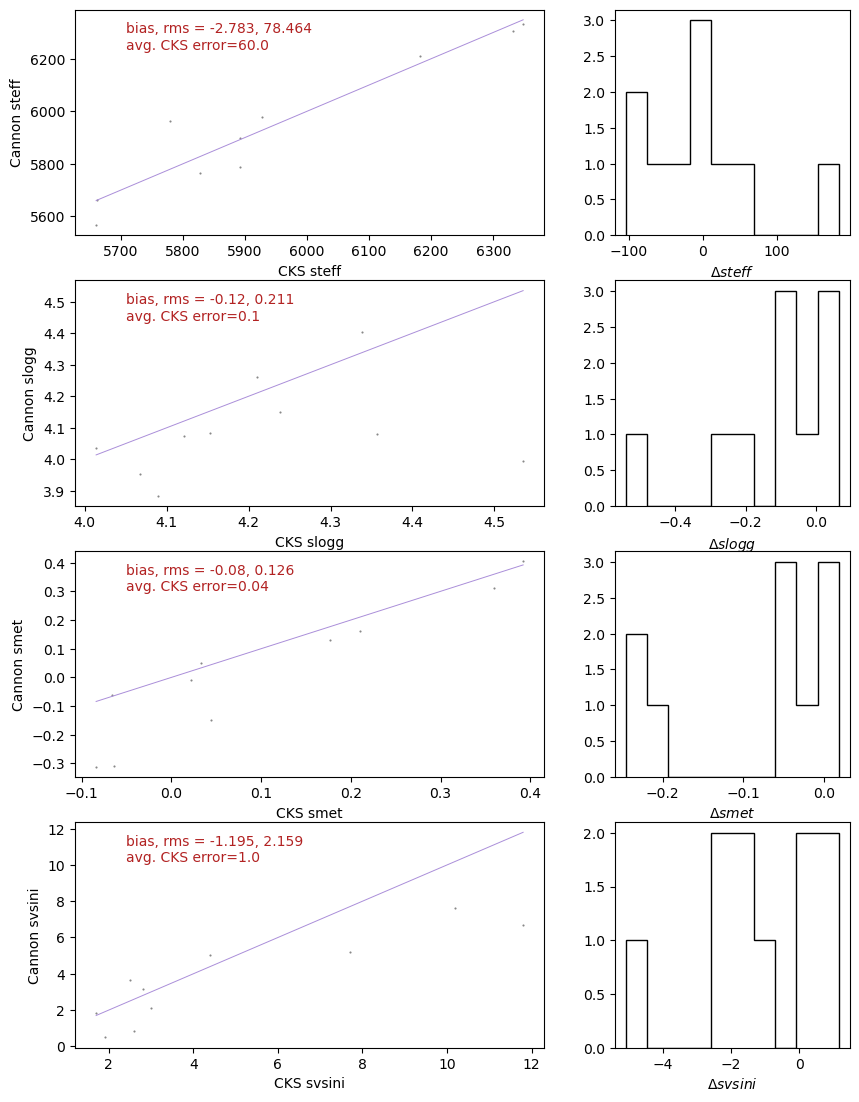

In [3]:
figure_path = './one_to_one_test.png'
plot_one_to_one(
    training_label_df, training_flux_df, training_sigma_df, cks_model, 
    figure_path, path_to_save_labels='training_set_cannon_labels')